# Analyzing Bankruptcy In America 2007-2016
##### By Mrinalini Krishna

Nine years ago, a series of events unfolded one of the worst financial crisis in the history of the country and the world. Stock markets across the globe crashed, some big corporations failed while others cut back costs to barely survive. Millions of Americans lost their jobs, saw their savings wiped out, had their homes foreclosed as their future descend into uncertainty.   

This analysis attempts to look at the bankruptcy filings recorded in the United States between 2007 and 2016 and examine statistical trends as well as determine the correlation of those numbers with other economic indicators.

### Data   
For the pupose of this analysis, we are taking into account national and statewide non-business bankruptcy filings data obtained from the U.S.Courts website. Unemployment data, both at the country-level and that on the level of each state has been sourced from the [Bureau of Labor Statistics](https://www.bls.gov/lau/). State Population data has been sourced from the Census Bureau.   

To understand creditworthyness and delinquency, [Credit Quality](https://www.newyorkfed.org/data-and-statistics/data-visualization/community-credit-profiles/index.html#inclusion/credit_quality/pct_ce_curr4qtrs) and [Delinquency Rate on All Loans](https://fred.stlouisfed.org/series/DRALACBS#0) data sets were obtained from the Federal Reserve databases. Out-of-pocket medical expenses data was provided by [Centers for Medicare and Medicaid Services](https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/NationalHealthExpendData/NationalHealthAccountsProjected.html).

## Overview   

A cursory compilation of the data reveals that non-business bankruptcies shot up dramatically in 2011, almost three years after the financial meltdown of 2008. That lag between the rise in bankruptcy filings and the financial turmoil almost seems counter-intutive. Which states felt the maximum impact, what factors were responsible for the spike in these figures, are some of the questions that I will attempt to answer in this analysis.


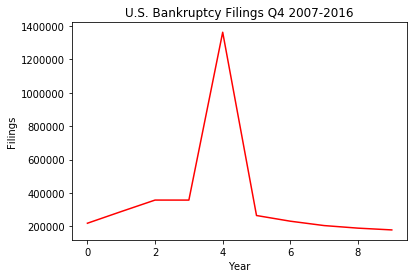

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statistics
df2 =pd.read_csv('C:/newfile.csv')
df3 = df2.set_index(['Year'])
a=pd.DataFrame(df2['TOTAL'])
plt.plot(a, color='red')
plt.ylabel('Filings')
plt.xlabel('Year')
plt.title('U.S. Bankruptcy Filings Q4 2007-2016')
plt.show()

### Question 1: Which states saw the most number of non-business bankruptcy filings?   

If we look at the absolute number of filings, California seems to be the state with the maximum number of bankruptcy filings, whereas Alaska has the lowest. 

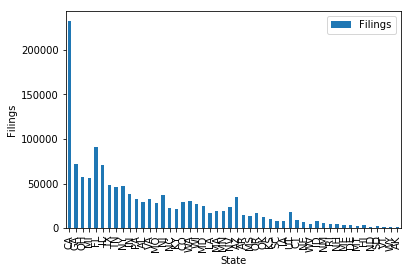

In [53]:
y = pd.DataFrame(df3.drop(['TOTAL'], axis = 1))
plt.figure(figsize=(20, 5))
statesonly =pd.DataFrame(y.max())
statesonly.columns= ['Filings']
statesonly.plot(kind = 'bar')
plt.ylabel('Filings')
plt.xlabel('State')
plt.show;

However, that number is highly skewed as California's population is much higher than that of Alaska. A more appropriate way to perhaps make the comparison would be to look at the filings rate, defined as the number of filings recorded by the state divided by the population of the state. A box-plot chart to plot that data will provide a better understanding of any outliers.

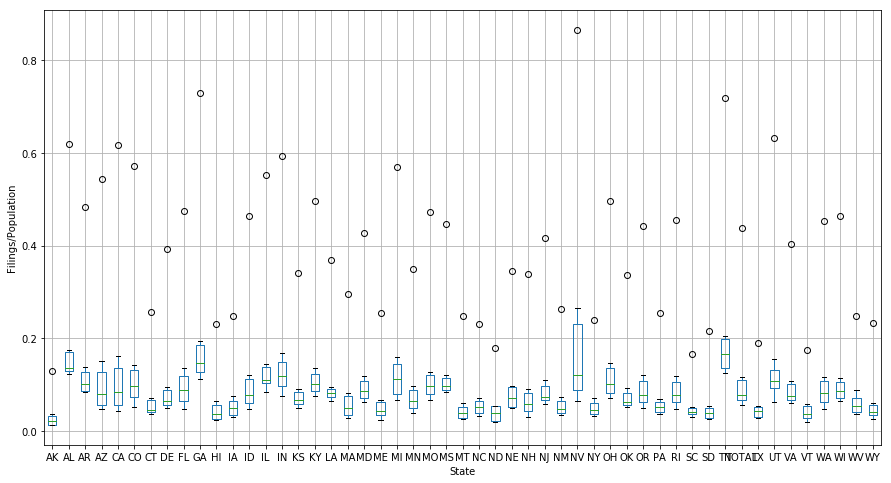

In [54]:
df =pd.read_csv('C:/state_pop2.csv')
c = list(df['Year'])
df = df.set_index(['Year'])
df4 = pd.DataFrame((df3.iloc[0:51]/df.iloc[0:51])*100)
df5 = df4.drop(['TOTAL'], axis = 1)
plt.figure(figsize=(15, 8))
plt.ylabel('Filings/Population')
plt.xlabel('State')
df4.boxplot();

Normalizing for population, this plot definitely changes the ranking order. While Alaska continues to exhibit the lowest bankruptcy filing rates, the outliers on the higher end of the spectrum are the states of Nevada, Georgia and Tennesse instead of California and Florida. 

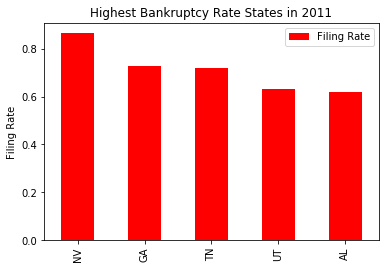

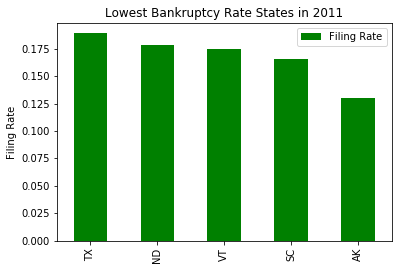

In [55]:
x= pd.DataFrame(df5.iloc[[4]])
x = x.T
x.columns = ['Filing Rate']
sort_x = x.sort_values(by='Filing Rate', ascending=False)
highest = sort_x.head()
lowest = sort_x.tail()
highest.plot(kind='bar', color = 'red')
plt.ylabel('Filing Rate')
plt.title('Highest Bankruptcy Rate States in 2011')
plt.show()
lowest.plot(kind='bar', color = 'green')
plt.ylabel('Filing Rate')
plt.title('Lowest Bankruptcy Rate States in 2011')
plt.show()

### Question 2: How do other economic factors affect bankruptcy filings?

#### Unemployment   
As corporations cut back on costs, job losses mounted. The unemployment rate, that is defined as those in the workforce who are actively seeking jobs but unable to get them, climed up. Needless to say, no jobs means no income from that job which makes paying bills harder. Is there a correlation between the high unemployment rate and the surge in bankruptcy filings? 

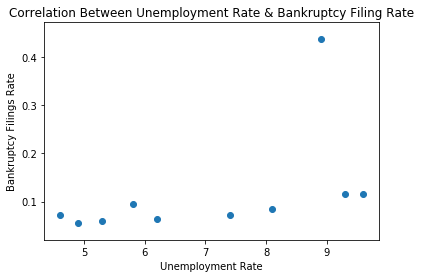

In [56]:
df6 =pd.read_csv('C:/unemployment1.csv')
df6 = df6.set_index(['Year'])
a = list(df6['TOTAL'])
b = list(df4['TOTAL'])
corr1 = pd.DataFrame()
corr1['Year']= c
corr1['unemployment'] = a
corr1['filings'] = b
corr1 = corr1.set_index(['Year'])
plt.scatter(x=corr1['unemployment'], y=corr1['filings'])
plt.xlabel('Unemployment Rate')
plt.ylabel('Bankruptcy Filings Rate')
plt.title('Correlation Between Unemployment Rate & Bankruptcy Filing Rate')
plt.show()

This flat plot, close to the x-axis suggests little correlation between the two variables. In fact, there clearly seems to be an outlying value, where the bankruptcy filing rate is unusually high for the corresponding unemployment rate. This plot certainly does not bring out a definitive relationship between the two variables.

#### Mortgage Delinquency   

The roots of the 2008 financial crisis lay in the housing market and subprime mortgages, which basically means mortgages given to people who weren't necessarily equiped to to pay them. Once the housing bubble burst, mortgage delinquencies begun to climb. 90-day delinquencies are considered serious and generally capture borrowers that have missed three or more mortgage payments. Did this play a role in the huge jump in non-business bankruptcy filings in 2011?

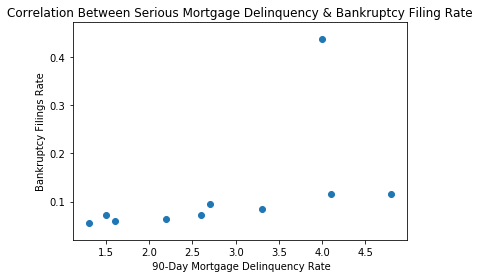

In [57]:
df8 =pd.read_csv('C:/mortgages.csv')
df8 = df8.set_index(['Year'])
f = list(df8['TOTAL'])
b = list(df4['TOTAL'])
corr2 = pd.DataFrame()
corr2['Year']= c
corr2['mortgage'] = f
corr2['filings'] = b
corr2 = corr2.set_index(['Year'])
plt.scatter(x=corr2['mortgage'], y=corr1['filings'])
plt.xlabel(' 90-Day Mortgage Delinquency Rate')
plt.ylabel('Bankruptcy Filings Rate')
plt.title('Correlation Between Serious Mortgage Delinquency & Bankruptcy Filing Rate')
plt.show()

Again there seems to be only one outliying number in this plot with very little seeming correlation between the two variables.

#### Health Expenditures

Healthcare expenditures, though a small part of the the household expenses according to a 2016 [Pew Research study](http://www.pewtrusts.org/en/research-and-analysis/issue-briefs/2016/03/household-expenditures-and-income), some experts believe that medical bills can be substantial and ptentially even lead to bankruptcy.   

A 2014 [study](http://digitalcommons.mainelaw.maine.edu/cgi/viewcontent.cgi?article=1079&context=mlr) by bankruptcy attorney Daniel Austin, then a professor at the Northeastern University School of Law, found that medical debt is the single largest factor in consumer bankruptcy. Nearly 26% of people who were part of that study – and had filed for bankruptcy – reported that their medical bills drove them to it. In this section I'll try to examine if any correlation exists between out of pocket healthcare expenses and bankruptcy filings. 


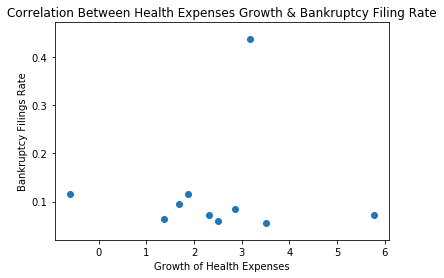

In [58]:
df9 =pd.read_csv('C:/health.csv')
df9 = df9.set_index(['Year'])
g = list(df9['opexpenses'])
h = list(df9['expensesgrowth'])
b = list(df4['TOTAL'])
corr3 = pd.DataFrame()
corr3['Year']= c
corr3['expensesgrowth'] = h
corr2['filings'] = b
corr3 = corr3.set_index(['Year'])
plt.scatter(x=corr3['expensesgrowth'], y=corr1['filings'])
plt.xlabel('Growth of Health Expenses')
plt.ylabel('Bankruptcy Filings Rate')
plt.title('Correlation Between Health Expenses Growth & Bankruptcy Filing Rate')
plt.show()

Clearly, the flat scatter plot indicating low correlation between bankruptcy filing rate and growth in out of pocket health expenses. This picture takes us in the direction of considering the 2011 spike in bankruptcy filings as an anomaly. 

### Question 3: Does it all add up, once the outlier is removed?   

If we consider the 2011 surge in bankruptcy filings, does the rest of the data then make more sense if we run the same analysis without the outlier?


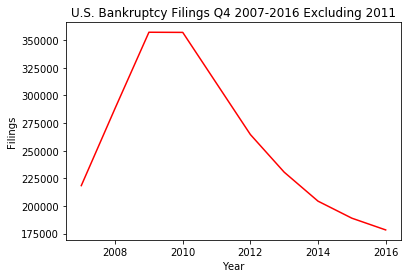

In [88]:
df2 =pd.read_csv('C:/newfile.csv')
j = df2.drop(df2.index[4])
j = j.set_index(['Year'])
plt.plot(j['TOTAL'], color='red')
plt.ylabel('Filings')
plt.xlabel('Year')
plt.title('U.S. Bankruptcy Filings Q4 2007-2016 Excluding 2011')
plt.show()

#### Relationship with Unemployment:

In [83]:
l['TOTAL']

Year
2007    4.6
2008    5.8
2009    9.3
2010    9.6
2012    8.1
2013    7.4
2014    6.2
2015    5.3
2016    4.9
Name: TOTAL, dtype: float64

In [92]:
df6 =pd.read_csv('C:/unemployment1.csv')
l= pd.DataFrame(df6)
l = df6.drop(df6.index[4])
l = l.set_index(['Year'])
a1 = list(l['TOTAL'])
b1 = list(j['TOTAL'])
corr1new = pd.DataFrame()
corr1new['Year']= c
corr1new['TOTAL'] = a1
corr1new['TOTAL'] = b1
corr1new = corr1new.set_index(['Year'])
plt.scatter(x=corr1new['unemployment'], y=corr1new['filings'])
plt.xlabel('Unemployment Rate')
plt.ylabel('Bankruptcy Filings Rate')
plt.title('Correlation Between Unemployment Rate & Bankruptcy Filing Rate')
plt.show()

ValueError: Length of values does not match length of index

### Further Research